In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Question - 1

In [2]:
numBandits = 10
numRuns = 2000
numSteps = 10000
eps = 0.1

In [5]:
globalCorrect = np.zeros(numSteps)
globalReward = np.zeros(numSteps)

for r in tqdm(range(numRuns)):
    avgReward = []
    avgCorrect = []
    q = np.zeros(numBandits)
    allSameBandits = np.random.normal(0, 1)
    bandits = np.array([allSameBandits]*10)
    timesSelected = np.zeros(numBandits)

    for i in range(numSteps):
        randomWalk = np.random.normal(0, 0.01, 10)
        bandits = bandits + randomWalk
        bestBandit = np.argmax(bandits)
        randomNumber = np.random.uniform(0,1)
        selectedBandit = np.argmax(q)
        if(randomNumber < eps):
            selectedBandit = np.random.randint(numBandits)
            
        timesSelected[selectedBandit] += 1
        reward = np.random.normal(bandits[selectedBandit], 1)
        avgReward.append(reward)
        alpha = 0.1 
#         alpha= 1/(timesSelected[selectedBandit])
        q[selectedBandit] += (reward - q[selectedBandit])*alpha
        if(selectedBandit == bestBandit):
            avgCorrect.append(1)
        else:
            avgCorrect.append(0)

    avgReward = np.array(avgReward)
    avgCorrect = np.array(avgCorrect)
    globalCorrect += avgCorrect
    globalReward += avgReward
globalReward/=numRuns
globalCorrect/=numRuns

100%|██████████| 2000/2000 [03:56<00:00,  8.46it/s]


In [6]:
globalRewardConst = globalReward
globalCorrectConst = globalCorrect

In [4]:
globalRewardVar = globalReward
globalCorrectVar = globalCorrect

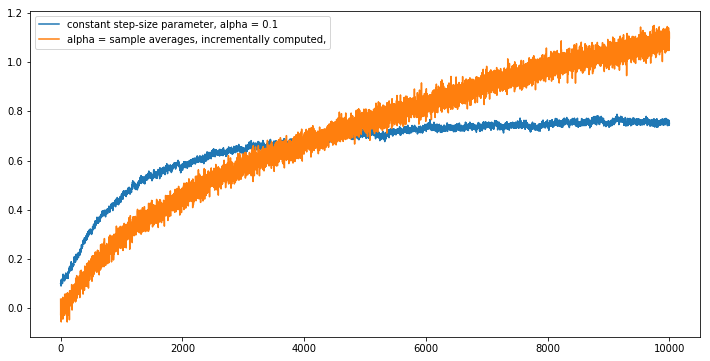

In [7]:
width = 12
height = 6
plt.figure(figsize=(width, height))
plt.plot(globalCorrect, label = 'constant step-size parameter, alpha = 0.1')
plt.plot(globalRewardVar, label = 'alpha = sample averages, incrementally computed,')
plt.legend()
plt.show()

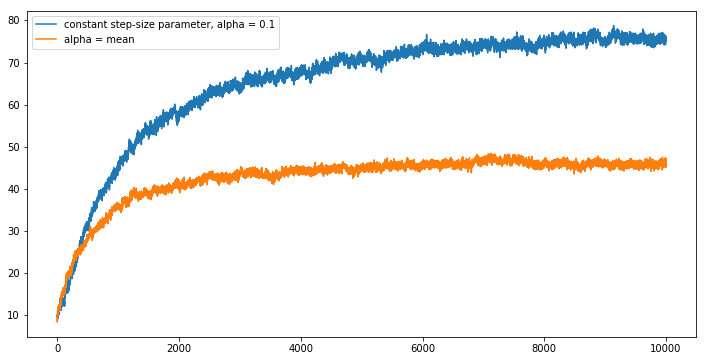

In [8]:
width = 12
height = 6
plt.figure(figsize=(width, height))
plt.plot(globalCorrectConst*100, label = 'constant step-size parameter, alpha = 0.1')
plt.plot(globalCorrectVar*100, label = 'alpha = mean')
plt.legend()
plt.show()

## Question - 2

#### Generate Fig2.3

In [11]:
numRuns = 2000
numSteps = 1000
eps = 0.1

globalCorrect = np.zeros(numSteps)
globalReward = np.zeros(numSteps)

for r in tqdm(range(numRuns)):
    avgReward = []
    avgCorrect = []
    q = np.zeros(10)
    q+=5
    eps = 0
    bandits = np.random.normal(0, 1, 10)
    timesSelected = np.zeros(10)
    for i in range(numSteps):
        bestBandit = np.argmax(bandits)
        randomNumber = np.random.uniform(0,1)
        selectedBandit = np.argmax(q)
        if(randomNumber < eps):
            selectedBandit = np.random.randint(10)

        timesSelected[selectedBandit] += 1
        reward = np.random.normal(bandits[selectedBandit], 1)
        alpha = 0.1
        q[selectedBandit] += (reward - q[selectedBandit])*alpha
        if(selectedBandit == bestBandit):
            avgCorrect.append(1)
        else:
            avgCorrect.append(0)

    avgCorrect = np.array(avgCorrect)
    globalCorrect += avgCorrect
globalCorrect/=numRuns

100%|██████████| 2000/2000 [00:13<00:00, 149.55it/s]


In [12]:
optimistic = globalCorrect

In [10]:
realistic = globalCorrect

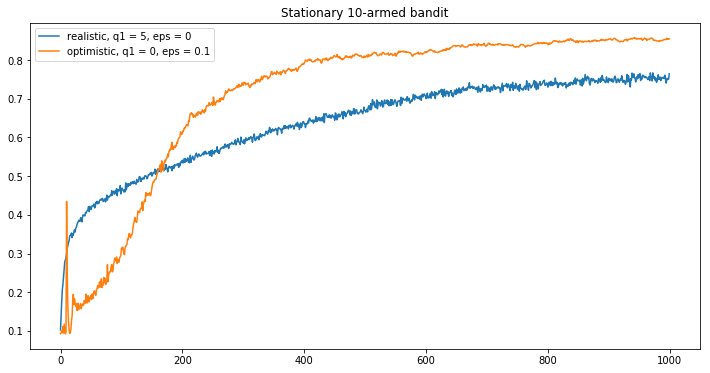

In [13]:
width = 12
height = 6
plt.figure(figsize=(width, height))
plt.plot(np.arange(numSteps), realistic, label = 'realistic, q1 = 5, eps = 0')
plt.plot(np.arange(numSteps), optimistic, label = 'optimistic, q1 = 0, eps = 0.1')
plt.title('Stationary 10-armed bandit')
plt.legend()

#### Reason for spikes
The oscillations in the early part of the curve occurs when the estimated values are still optimistic. The curve is increases initially because the best bandit is chosen; the values are still optimistic. The value of the best bandit decrease; so other(non-optimal) bandits were chosen because their values were still optimistic. This process makes the curve osciallte until estimated values are not closer to the real values. 

This means that optimistic greedy strategy is not a good option when the number of steps are small. When there are less number of steps, realistic epsilon greedy is a better choice. 




#### Figure 2.3 for Non-Stationary

In [10]:
numRuns = 2000
numSteps = 2000
eps = 0.1
alpha = 0.1 

globalCorrect = np.zeros(numSteps)

for r in tqdm(range(numRuns)):
    avgCorrect = []
    q = np.zeros(10)
#     q+=5
    allSameBandits = np.random.normal(0, 1)
    bandits = np.array([allSameBandits]*10)
    for i in range(numSteps):
        randomWalk = np.random.normal(0, 0.1, 10)
        bandits = bandits + randomWalk
        bestBandit = np.argmax(bandits)
        randomNumber = np.random.uniform(0,1)
        selectedBandit = np.argmax(q)
        if(randomNumber < eps):
            selectedBandit = np.random.randint(10)

        reward = np.random.normal(bandits[selectedBandit], 1)
        q[selectedBandit] += (reward - q[selectedBandit])*alpha
        if(selectedBandit == bestBandit):
            avgCorrect.append(1)
        else:
            avgCorrect.append(0)
    avgCorrect = np.array(avgCorrect)
    globalCorrect += avgCorrect
globalCorrect/=numRuns

100%|██████████| 2000/2000 [00:42<00:00, 47.08it/s]


In [9]:
optimisticNonStat = globalCorrect

In [11]:
realisticNonStat = globalCorrect

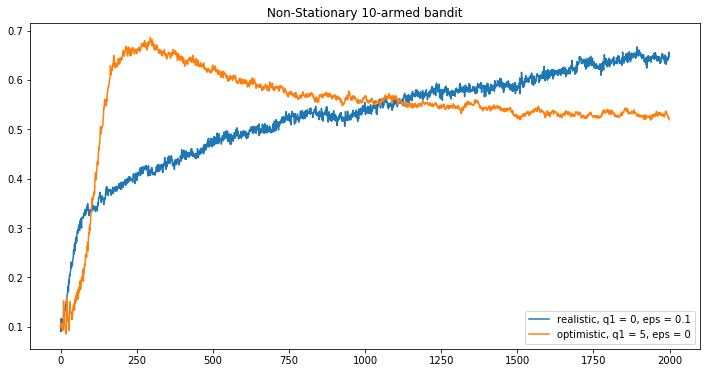

In [12]:
width = 12
height = 6
plt.figure(figsize=(width, height))
plt.plot(realisticNonStat, label = 'realistic, q1 = 0, eps = 0.1')
plt.plot(optimisticNonStat, label = 'optimistic, q1 = 5, eps = 0')
plt.title('Non-Stationary 10-armed bandit')
plt.legend()

For non-stationary case, since the bandits' values are constanlty being changed by random-walks, optimistic strategy will perform poorly. Because in optimistic strategy, exploration takes place only in the beginning. When we have non-stationary bandits, realistic epsilon-greedy performs better in the long run. 

For stationary case, since the bandits are not changing, optimistic strategy performs better than epsilon-greedy.

### Question - 3

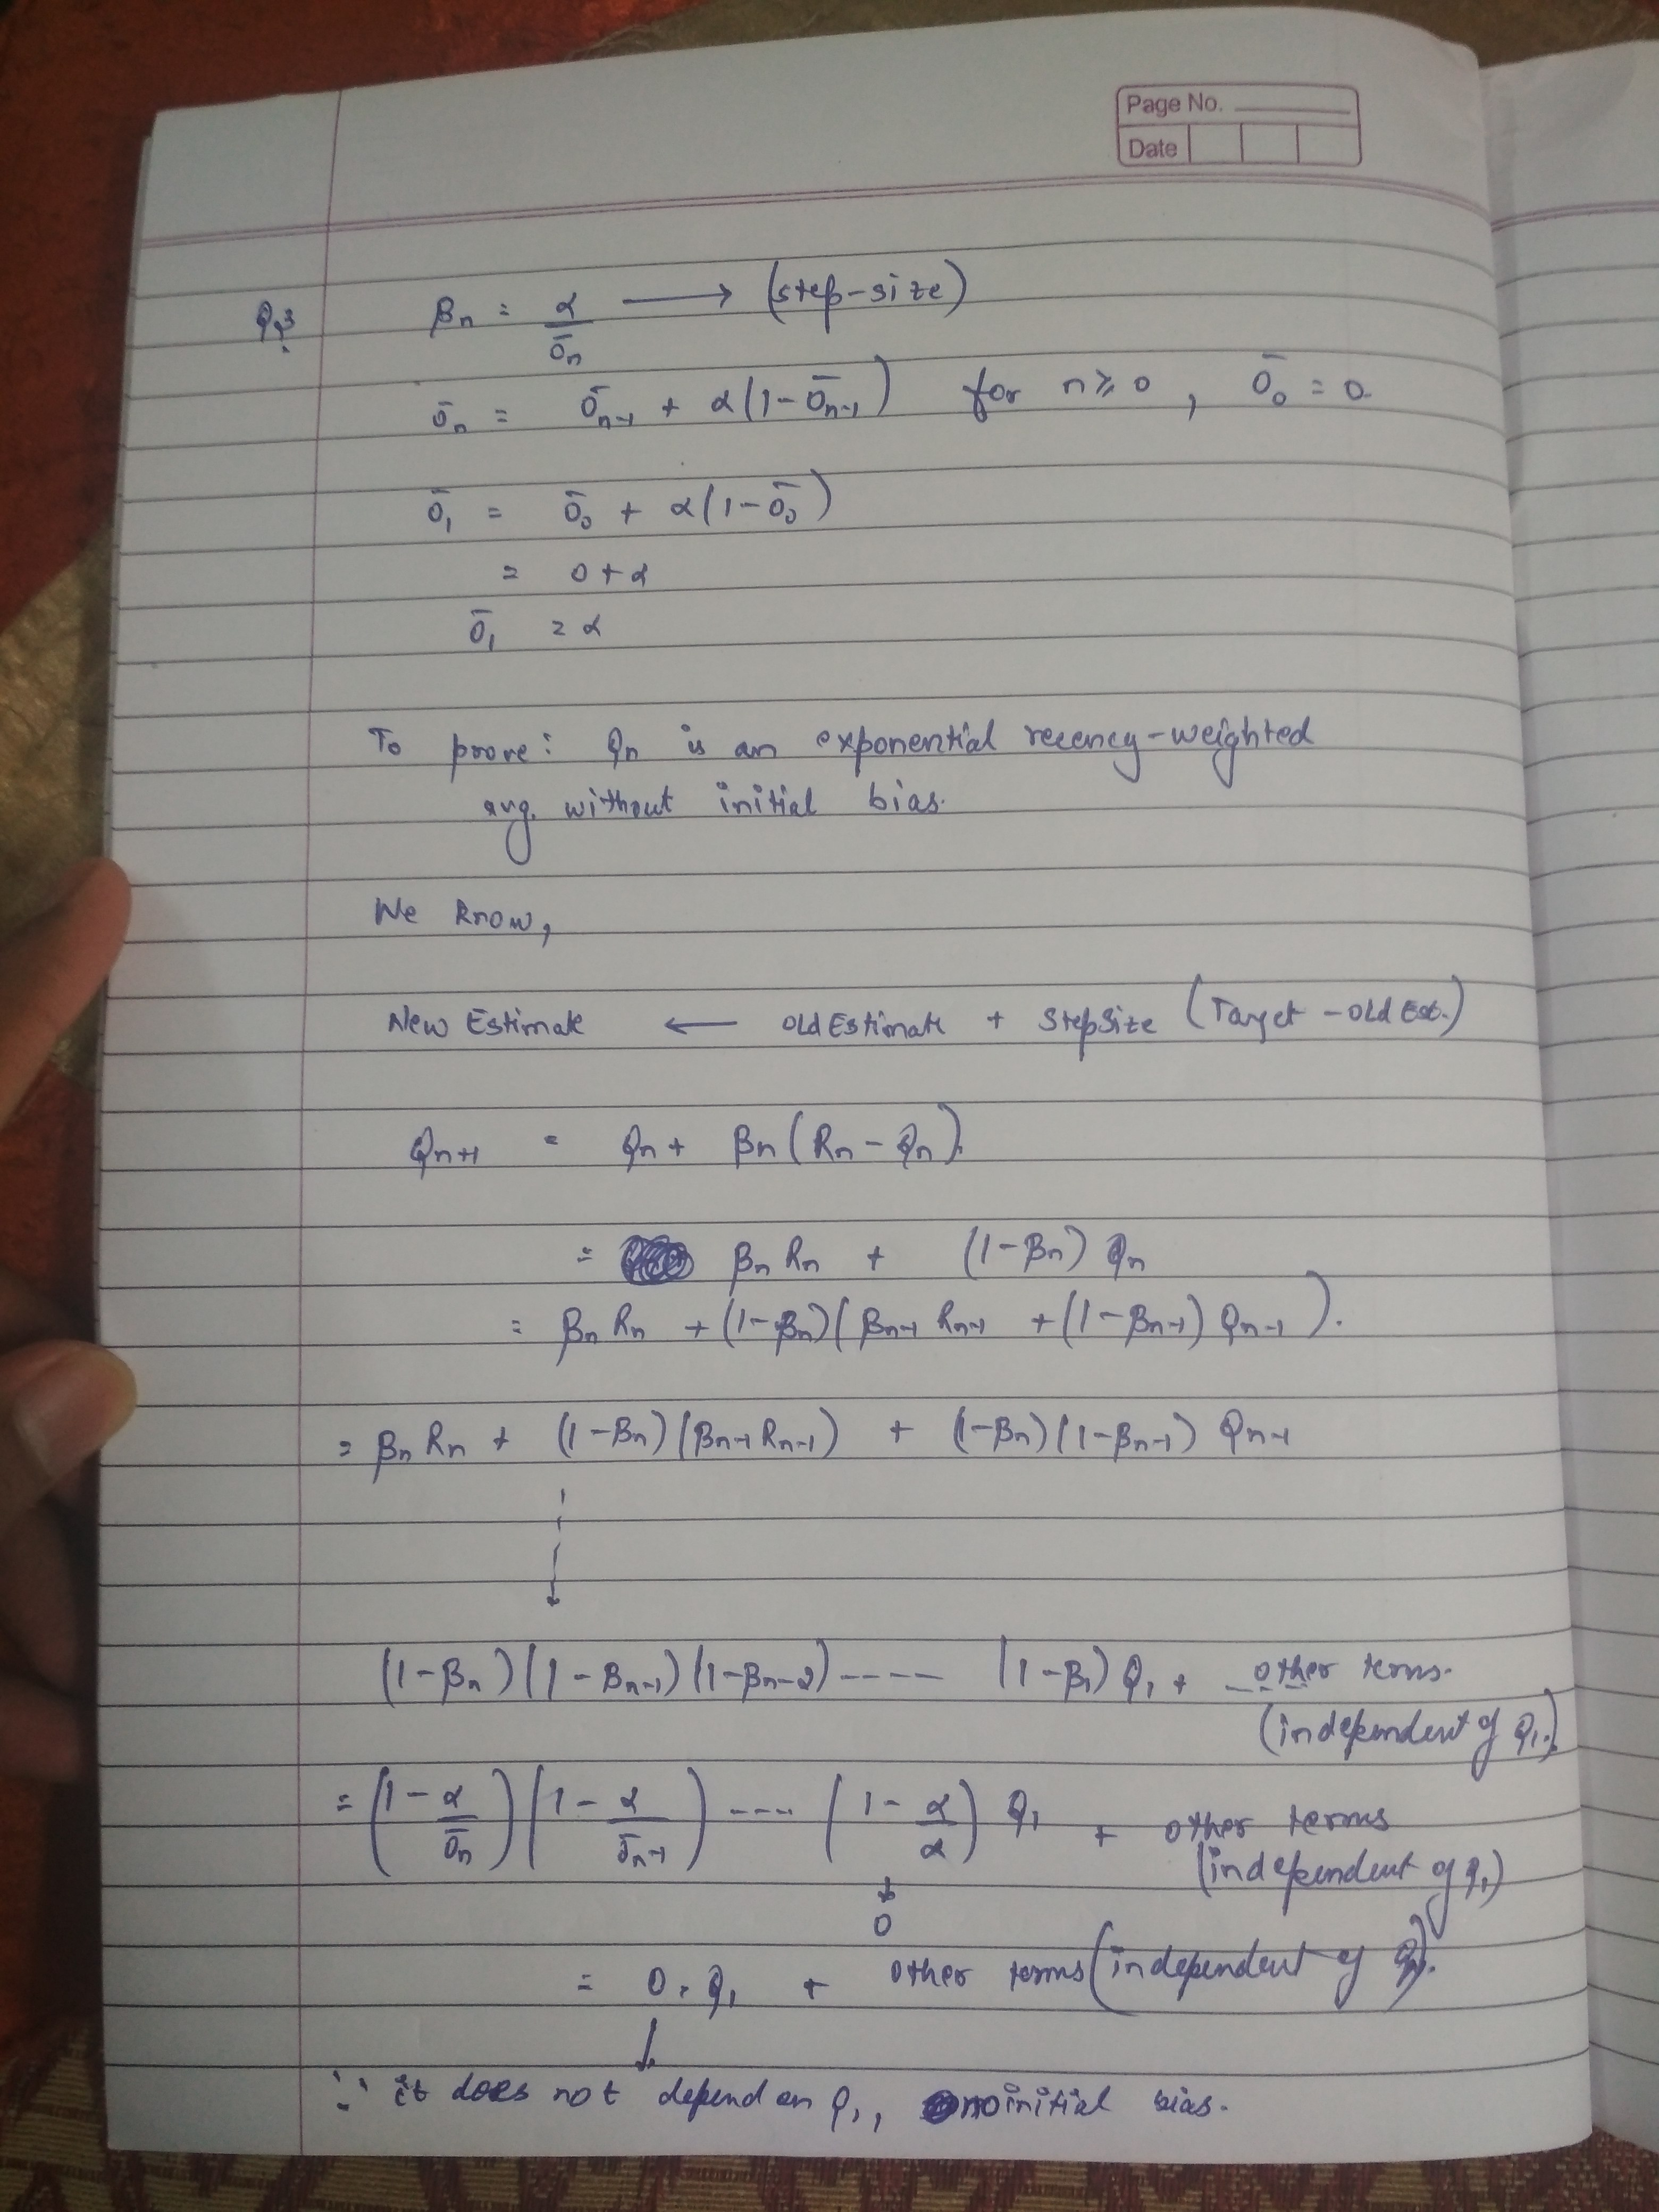

In [33]:
from IPython.display import Image
Image(filename='IMG_20190829_200016.jpg') 

### Question - 4

#### Non-Stationary Case

In [57]:
numRuns = 2000
numSteps = 3000
eps = 0
alpha = 0.1
ucbCase = False
globalCorrect = np.zeros(numSteps)
globalReward = np.zeros(numSteps)
for r in tqdm(range(numRuns)):
    avgCorrect = []
    avgReward = []
    q = np.zeros(10)
    q+=5
    timesSelected = np.zeros(10)
#     timesSelected+=1
    allSameBandits = np.random.normal(0, 1)
    bandits = np.array([allSameBandits]*10)
    for i in range(numSteps):
        bestBandit = np.argmax(bandits)
        if(ucbCase):
            c = 2
            ucb = np.zeros(10)
            for j in range(10):
                if(timesSelected[j]==0):
                    ucb[j] = 1e18
                else:
                    ucb[j] = q[j] + c*np.sqrt(np.log(i+1)/timesSelected[j])
            selectedBandit = np.argmax(ucb)
        else:
            randomNumber = np.random.uniform(0,1)
            selectedBandit = np.argmax(q)
            if(randomNumber < eps):
                selectedBandit = np.random.randint(10)

        reward = np.random.normal(bandits[selectedBandit], 1)
        avgReward.append(reward)
        q[selectedBandit] += (reward - q[selectedBandit])*alpha
        timesSelected[selectedBandit]+=1
        if(selectedBandit == bestBandit):
            avgCorrect.append(1)
        else:
            avgCorrect.append(0)
            
        randomWalk = np.random.normal(0, 0.1, 10)
        bandits = bandits + randomWalk
        
    avgCorrect = np.array(avgCorrect)
    avgReward = np.array(avgReward)
    globalCorrect += avgCorrect
    globalReward += avgReward
globalCorrect/=numRuns
globalReward/=numRuns

100%|██████████| 2000/2000 [01:02<00:00, 31.83it/s]


In [56]:
NSepsGreedyCorrect = globalCorrect
NSepsGreedyReward = globalReward

In [58]:
NSoptCorrect = globalCorrect
NSoptReward = globalReward

In [52]:
NSucbCorrect = globalCorrect
NSucbReward = globalReward

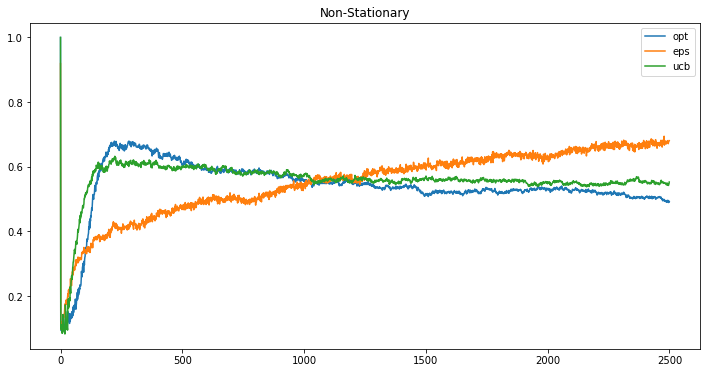

In [67]:
width = 12
height = 6
plt.figure(figsize=(width, height))
plt.plot(NSoptCorrect[:2500], label = 'opt')
plt.plot(NSepsGreedyCorrect[:2500], label = 'eps')
plt.plot(NSucbCorrect[:2500], label = 'ucb')
plt.title('Non-Stationary')
plt.legend()

For non-stationary case, the bandits are constantly changing so the Optimistic method performs worst as expected (because it performs exploration only in the beginning). The UCB Method takes into account the number of times a particular action has been selected, because after some steps have been selected enough number of times, the UCB method does not really care for exploration. Epsilon-greedy performs best because it constantly explores with probability 0.1, so it is constantly improving for the non-stationary case.  

### Stationary Case

In [64]:
numRuns = 2000
numSteps = 3000
eps = 0
alpha = 0.1 
ucbCase = False
globalCorrect = np.zeros(numSteps)
globalReward = np.zeros(numSteps)
for r in tqdm(range(numRuns)):
    avgCorrect = []
    avgReward = []
    q = np.zeros(10)
    q+=5
    timesSelected = np.zeros(10) 
    bandits = np.random.normal(0, 1, 10)
    for i in range(numSteps):
        bestBandit = np.argmax(bandits)
        if(ucbCase):
            c = 2
            ucb = np.zeros(10)
            for j in range(10):
                if(timesSelected[j]==0):
                    ucb[j] = 1e18
                else:
                    ucb[j] = q[j] + c*np.sqrt(np.log(i+1)/timesSelected[j])
            selectedBandit = np.argmax(ucb)
        else:
            randomNumber = np.random.uniform(0,1)
            selectedBandit = np.argmax(q)
            if(randomNumber < eps):
                selectedBandit = np.random.randint(10)

        reward = np.random.normal(bandits[selectedBandit], 1)
        avgReward.append(reward)
        q[selectedBandit] += (reward - q[selectedBandit])*alpha
        timesSelected[selectedBandit]+=1
        if(selectedBandit == bestBandit):
            avgCorrect.append(1)
        else:
            avgCorrect.append(0)
    avgCorrect = np.array(avgCorrect)
    avgReward = np.array(avgReward)
    globalCorrect += avgCorrect
    globalReward += avgReward
globalCorrect/=numRuns
globalReward/=numRuns

100%|██████████| 2000/2000 [00:40<00:00, 49.94it/s]


In [63]:
SepsGreedyCorrect = globalCorrect
SepsGreedyReward = globalReward

In [61]:
SucbCorrect = globalCorrect
SucbReward = globalReward

In [65]:
SoptCorrect = globalCorrect
SoptReward = globalReward

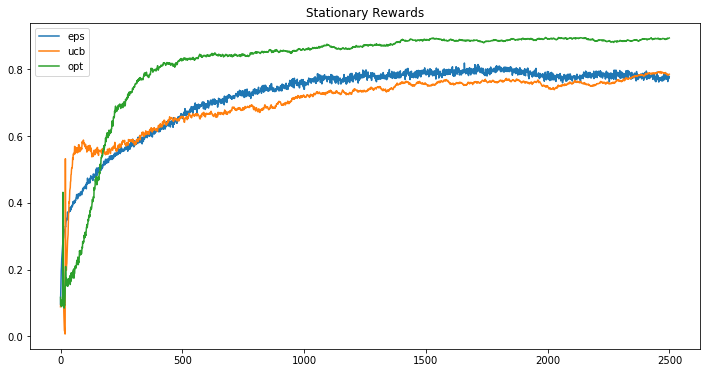

In [68]:
width = 12
height = 6
plt.figure(figsize=(width, height))
plt.plot(SepsGreedyCorrect[:2500], label = 'eps')
plt.plot(SucbCorrect[:2500], label = 'ucb')
plt.plot(SoptCorrect[:2500], label = 'opt')
plt.title('Stationary Rewards')
plt.legend()

In stationary bandits problem, optimistic initial values method out-performs both UCB and Epsilon-Greedy. This is because since the bandits are not changing, the initial exploration of Optimistic Method is enough for exploration. After each action have been visited almost similar number of times, UCB does not really encourage exploring. In epsilon-greedy, around 10% of times, exploration takes place continously. 